Rincian Tugas:
1. Carilah sebuah dataset (dari kaggle ataupun website lainnya)
2. Lakukan Exploratory Data Analysis pada dataset tersebut.
  - EDA yang dilakukan WAJIB melakukan `Handling Missing Value dan Duplicate`
  - Proses EDA yang lain bersifat opsional (e.g. *handling outlier*, *encoding*)
3. Buat portfolio dalam bentuk Power Point
4. Upload di LinkedIn dan tag dibimbing.id

##Hasil Tugas

1. Mengimpor pustaka yang diperlukan

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

2. Membaca Dataset

In [6]:
data = pd.read_csv('/content/airlines_flights_data.csv')

In [7]:
data

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52222,52222,GO_FIRST,G8-339,Mumbai,Evening,zero,Night,Delhi,Economy,2.08,47.0,2339.0
52223,52223,SpiceJet,SG-8179,Mumbai,Night,zero,Night,Delhi,Economy,2.08,47.0,2339.0
52224,52224,AirAsia,I5-330,Mumbai,Night,zero,Late_Night,Delhi,Economy,2.08,47.0,2339.0
52225,52225,AirAsia,I5-767,Mumbai,Early_Morning,zero,Morning,Delhi,Economy,2.17,47.0,2339.0


In [8]:
data.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0


In [9]:
data.tail()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
52222,52222,GO_FIRST,G8-339,Mumbai,Evening,zero,Night,Delhi,Economy,2.08,47.0,2339.0
52223,52223,SpiceJet,SG-8179,Mumbai,Night,zero,Night,Delhi,Economy,2.08,47.0,2339.0
52224,52224,AirAsia,I5-330,Mumbai,Night,zero,Late_Night,Delhi,Economy,2.08,47.0,2339.0
52225,52225,AirAsia,I5-767,Mumbai,Early_Morning,zero,Morning,Delhi,Economy,2.17,47.0,2339.0
52226,52226,GO_FIRST,G8-321,Mumbai,Afternoon,zero,Afternoon,Delhi,Ec,NaN,NaN,NaN


3. Menganalisis Data

In [10]:
data.drop( columns = 'index', inplace = True)

In [11]:
data

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...
52222,GO_FIRST,G8-339,Mumbai,Evening,zero,Night,Delhi,Economy,2.08,47.0,2339.0
52223,SpiceJet,SG-8179,Mumbai,Night,zero,Night,Delhi,Economy,2.08,47.0,2339.0
52224,AirAsia,I5-330,Mumbai,Night,zero,Late_Night,Delhi,Economy,2.08,47.0,2339.0
52225,AirAsia,I5-767,Mumbai,Early_Morning,zero,Morning,Delhi,Economy,2.17,47.0,2339.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52227 entries, 0 to 52226
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           52227 non-null  object 
 1   flight            52227 non-null  object 
 2   source_city       52227 non-null  object 
 3   departure_time    52227 non-null  object 
 4   stops             52227 non-null  object 
 5   arrival_time      52227 non-null  object 
 6   destination_city  52227 non-null  object 
 7   class             52227 non-null  object 
 8   duration          52226 non-null  float64
 9   days_left         52226 non-null  float64
 10  price             52226 non-null  float64
dtypes: float64(3), object(8)
memory usage: 4.4+ MB


In [13]:
data.describe()

,duration,days_left,price
count,52226.000000,52226.000000,52226.000000
mean,10.589151,25.879409,6237.856298
std,7.119793,13.449795,3676.946408
min,1.830000,1.000000,1998.000000
25%,5.330000,15.000000,3988.000000
50%,9.080000,26.000000,5507.000000
75%,14.250000,37.000000,7423.000000
max,39.670000,49.000000,35145.000000


In [14]:
data.columns.tolist()

['airline',
 'flight',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left',
 'price']

4. Memeriksa nilai yang hilang

In [18]:
data.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,1
days_left,1


5. Mengecek apakah ada duplicate di seluruh kolom

In [19]:
check_duplicate = data.duplicated().sum()

print(f"Jumlah data yang duplikat = {check_duplicate}")

Jumlah data yang duplikat = 0


In [20]:
data.nunique()

,0
airline,6
flight,672
source_city,2
departure_time,6
stops,3
arrival_time,6
destination_city,6
class,2
duration,345
days_left,49


In [ ]:
data.dtypes

,0
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64
days_left,int64


**Maskapai penerbangan apa saja yang ada dalam dataset ini, beserta frekuensinya?**

In [ ]:
data['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [ ]:
data['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


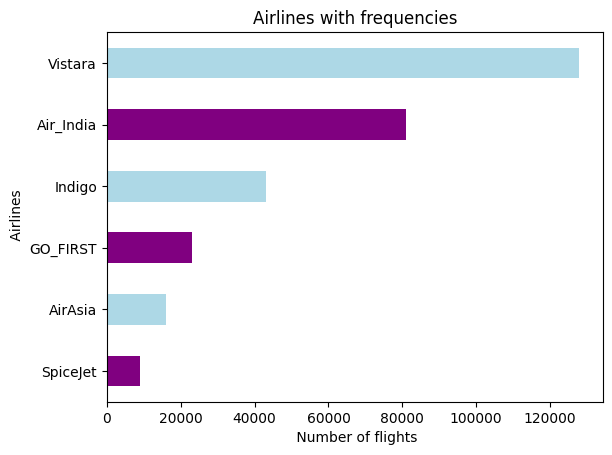

In [ ]:
data['airline'].value_counts(ascending=True).plot.barh( color = ['purple', 'lightblue'])

plt.title("Airlines with frequencies")

plt.xlabel(" Number of flights")

plt.ylabel(" Airlines")

plt.show()

**Tunjukkan Grafik Batang yang menggambarkan Waktu Keberangkatan dan Waktu Kedatangan**

In [ ]:
data['departure_time'].value_counts()

,count
departure_time,
Morning,71146
Early_Morning,66790
Evening,65102
Night,48015
Afternoon,47794
Late_Night,1306


In [ ]:
data['arrival_time'].value_counts()

,count
arrival_time,
Night,91538
Evening,78323
Morning,62735
Afternoon,38139
Early_Morning,15417
Late_Night,14001


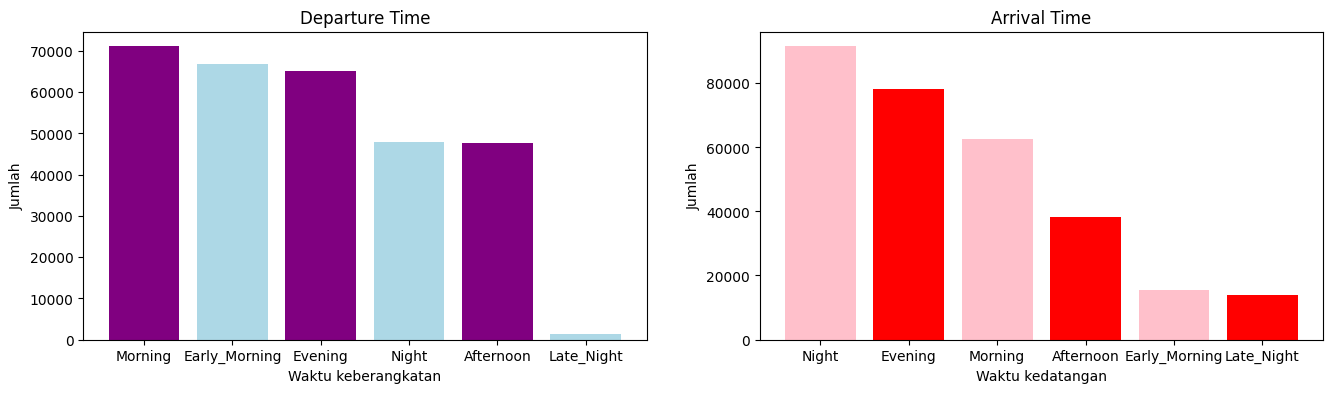

In [ ]:
plt.figure(figsize = (16,4))

plt.subplot(1,2,1)

plt.bar( data['departure_time'].value_counts().index , data['departure_time'].value_counts().values, color = ['purple', 'lightblue'] )
plt.title("Departure Time")
plt.xlabel("Waktu keberangkatan")
plt.ylabel("Jumlah")

plt.subplot(1,2,2)

plt.bar( data['arrival_time'].value_counts().index, data['arrival_time'].value_counts().values, color = ['pink', 'red'])
plt.title("Arrival Time")
plt.xlabel("Waktu kedatangan")
plt.ylabel("Jumlah")

plt.show()

**Tampilkan Grafik Batang yang mewakili Kota Sumber dan Kota Tujuan.**

In [ ]:
data['source_city'].value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [ ]:
data['destination_city'].value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


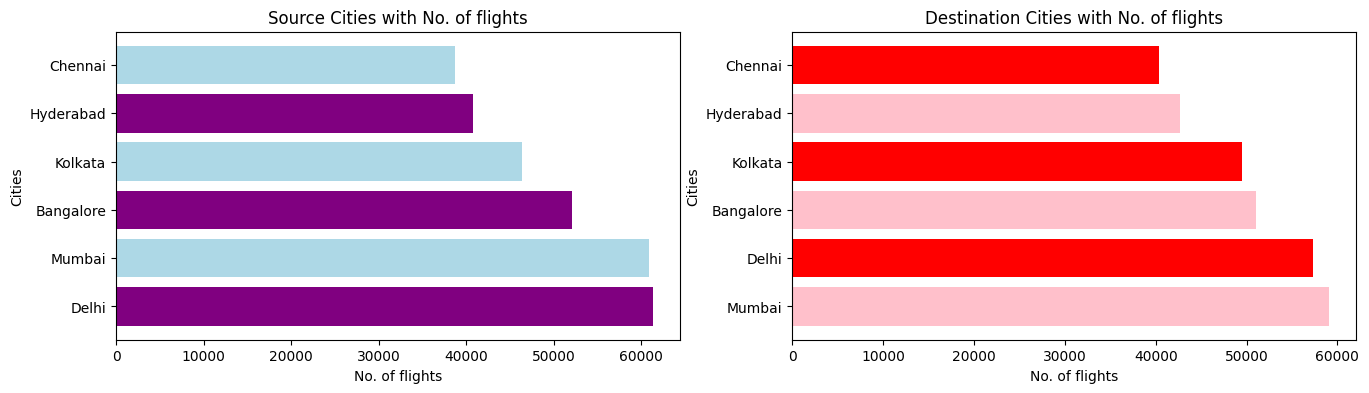

In [ ]:
plt.figure( figsize= (16,4))

plt.subplot(1,2,1)

plt.barh( data['source_city'].value_counts().index , data['source_city'].value_counts().values, color = ['purple', 'lightblue'])
plt.title("Source Cities with No. of flights")
plt.ylabel("Cities")
plt.xlabel("No. of flights")

plt.subplot(1,2,2)

plt.barh( data['destination_city'].value_counts().index , data['destination_city'].value_counts().values, color = ['pink', 'r'])
plt.title("Destination Cities with No. of flights")
plt.ylabel("Cities")
plt.xlabel("No. of flights")

plt.show()

**Apakah harga bervariasi tergantung maskapai penerbangan?**

In [ ]:
data.groupby('airline')['price'].mean()

,price
airline,
AirAsia,4091.072742
Air_India,23507.019112
GO_FIRST,5652.007595
Indigo,5324.216303
SpiceJet,6179.278881
Vistara,30396.536302


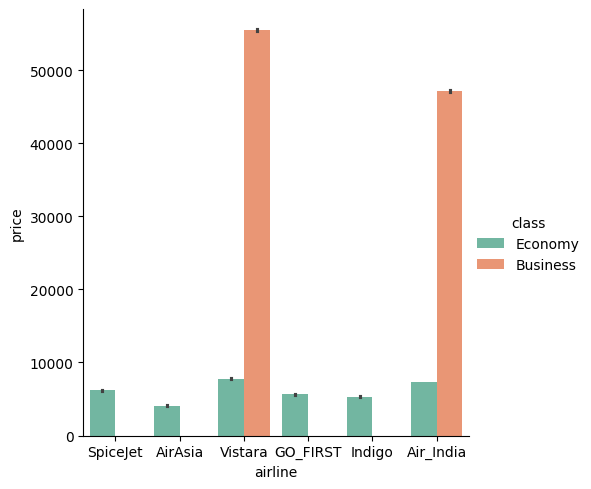

In [ ]:
sns.catplot( x = 'airline', y = 'price', kind = 'bar', palette ='Set2', data = data, hue = 'class')

plt.show()

**Bagaimana harga terpengaruh jika tiket dibeli hanya 1 atau 2 hari sebelum keberangkatan?**

In [ ]:
data['days_left'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [ ]:
data.groupby('days_left')['price'].mean()

,price
days_left,
1,21591.867151
2,30211.299801
3,28976.083569
4,25730.905653
5,26679.773368
6,24856.493902
7,25588.367351
8,24895.883995
9,25726.246072


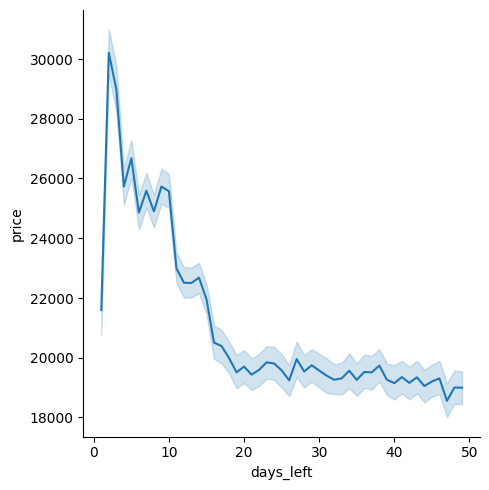

In [ ]:
sns.relplot( y='price', x = 'days_left', kind = 'line',data = data )

plt.show()